In [14]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [15]:
from society.agents import AnalyticalAgent
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
from plotting.basic import *
from matplotlib import pyplot as plt
from computations.insights.relative import diversity, disagreement
from plotting.summaries import *
import pandas as pd

In [32]:
linespace = Distribution(type="linespace", range=(-1,1))
update_rule = UpdateRule(evaluation_bias=0.3, rewire_probability=1)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)
network = ArtificialNetwork(100, "random_graph", p = 0.2)

In [34]:
def compute_div_dis(ev, rw):
    unique = Distribution(type="unique", value=0.1)
    belief_distribution = BeliefDistribution(unique, linespace)
    agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
    update_rule = UpdateRule(evaluation_bias=ev, rewire_probability=rw)
    interactions = Interactions(update_rule, interacting_agents=True)

    densities = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01]
    repetitions = 100
    results_diversity = []
    results_disagreement= []
    for density in densities:
        for i in range(repetitions):
            agent_network.network =  ArtificialNetwork(100, "random_graph", p = density)
            simulation.run(interactions, agent_network)
            beliefs = simulation.insights.belief_evolution.T[simulation.iterations]
            mean = np.mean(beliefs)
            beliefs = simulation.insights.belief_evolution.T[simulation.iterations]
            edges = agent_network.get_edges()
            agents = agent_network.agent_lookup
            results_disagreement.append((disagreement(agents, edges), density))
            results_diversity.append((diversity(agent_network, mean), density))

    df_diversity = pd.DataFrame(results_diversity, columns=['Diversity', 'Density'])
    df_disagreement = pd.DataFrame(results_disagreement, columns=['Disagreement', 'Density'])
    return df_diversity, df_disagreement


In [19]:
df1_div, df1_dis = compute_div_dis(0, 0)
df1_div.to_csv('../../../results/data/random_graph/no_rewire/div1.csv')
df1_dis.to_csv('../../../results/data/random_graph/no_rewire/dis1.csv')

df1_rw_div, df1_rw_dis = compute_div_dis(0, 1)
df1_rw_div.to_csv('../../../results/data/random_graph/rewire/div1.csv')
df1_rw_dis.to_csv('../../../results/data/random_graph/rewire/dis1.csv')

df2_div, df2_dis = compute_div_dis(0.3, 0)
df2_div.to_csv('../../../results/data/random_graph/no_rewire/div2.csv')
df2_dis.to_csv('../../../results/data/random_graph/no_rewire/dis2.csv')

df2_rw_div, df2_rw_dis = compute_div_dis(0.3, 1)
df2_rw_div.to_csv('../../../results/data/random_graph/rewire/div2.csv')
df2_rw_dis.to_csv('../../../results/data/random_graph/rewire/dis2.csv')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axe

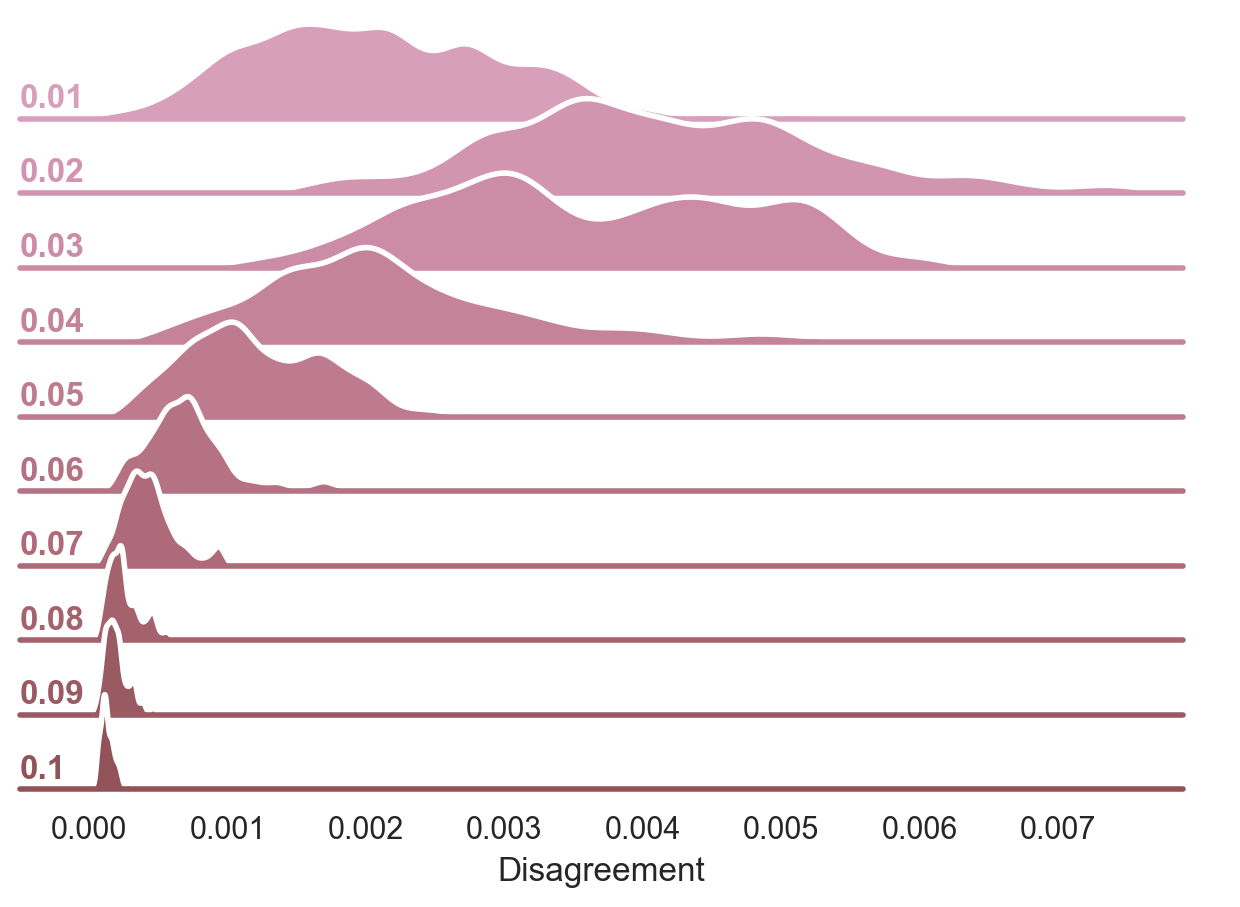

In [31]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = df_disagreement
    # Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(pd.unique(df["Density"])),start=1.2, rot=-.25, light=.7,dark=.4)
g = sns.FacetGrid(df, row="Density", hue="Density", aspect=15, height=.5, palette=pal, sharey=False, xlim=(-0.0005, 0.0079))

    # Draw the densities in a few steps
g.map(sns.kdeplot,  "Disagreement",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=0.15)
g.map(sns.kdeplot, "Disagreement", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


g.map(label, "Disagreement")

    # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)
    # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig('../../../results/plots/Results/ER/dis_rw_nobias_0.1.pdf')  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axe

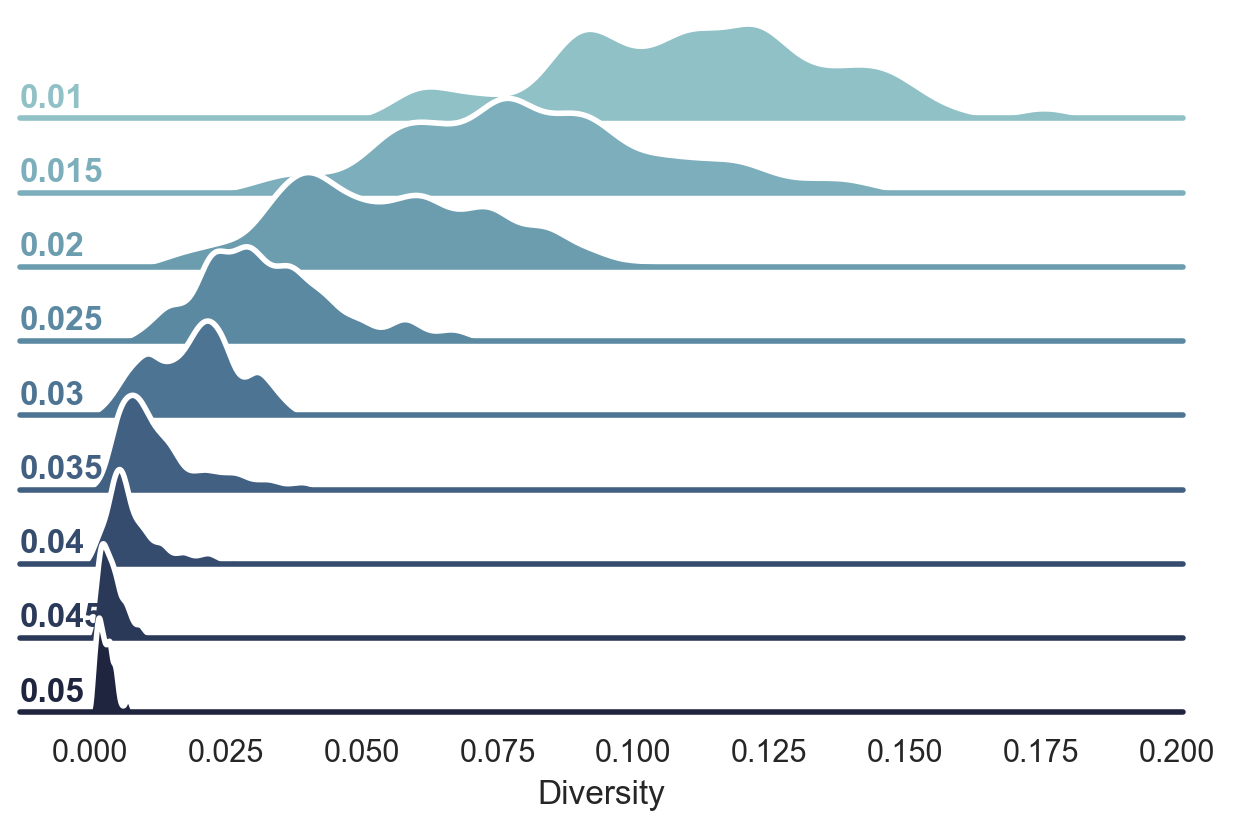

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = df_diversity
    # Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(pd.unique(df["Density"])), rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Density", hue="Density", aspect=15, height=.5, palette=pal, sharey=False)

    # Draw the densities in a few steps
g.map(sns.kdeplot,  "Diversity",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=0.15)
g.map(sns.kdeplot, "Diversity", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


g.map(label, "Diversity")

    # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)
    # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.savefig('../../../results/plots/Results/ER/div_rw_nobias_0.1.pdf')  